# Introduction
In this notebook, we are using the Keras API in Tensorflow 2.X to build an image classifier to recognize Handwritten digits using the Mnist data.

# Loading Tensorflow and checking the version

In [ ]:
import tensorflow as tf
print(tf.__version__)

2.6.0


- If not installed, uncomment the following cell. 
- **PS:** using pip not conda as everything on colab is prepared for you (cuda).

In [ ]:
#!pip install tensorflow==2.5.0 

# Data Loading and exploring

In [ ]:
from tensorflow.keras.datasets import mnist

(training_images, training_labels),(testing_images, testing_labels) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [ ]:
print("The number of training images is {}".format(training_images.shape[0]))
print("The number of testing images is {}".format(testing_images.shape[0]))
print("The shape of an image is {}X{}".format(training_images.shape[1],
                                              training_images.shape[2]))

The number of training images is 60000
The number of testing images is 10000
The shape of an image is 28X28


In [ ]:
import numpy as np
import random
np.set_printoptions(linewidth=200)
import matplotlib.pyplot as plt

5


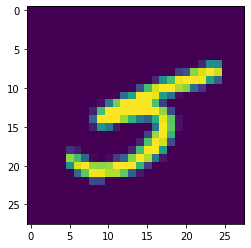

In [ ]:
img_number = random.randint(0, training_images.shape[0])
plt.imshow(training_images[img_number])
print(training_labels[img_number])

All of the pixels values are between 0 and 255. If we are training a neural network, for various reasons it's easier that all values are between 0 and 1.

This can be done using `normalizing`

In [ ]:
training_images  = training_images / 255.0
testing_images = testing_images / 255.0

# Defining the model using **Sequential** API

In [ ]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Flatten

In [ ]:
model = Sequential([Flatten(input_shape=(28,28)), 
                    Dense(128, activation=tf.nn.relu), 
                    Dense(10, activation=tf.nn.softmax)])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


Define the **optimizer** and the **loss**

In [ ]:
model.compile(optimizer = tf.optimizers.Adam(),
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

Train the model

In [ ]:
model.fit(training_images, training_labels, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 7s 2ms/step - loss: 0.2582 - accuracy: 0.9260
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1118 - accuracy: 0.9679
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0783 - accuracy: 0.9762
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0592 - accuracy: 0.9822
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0439 - accuracy: 0.9861


Evaluate the model on the test images

In [ ]:
evaluation = model.evaluate(testing_images, testing_labels)
print("Accuracy on the testing images is {}".format(evaluation[1]*100))

313/313 [==============================] - 1s 3ms/step - loss: 0.0835 - accuracy: 0.9743
Accuracy on the testing images is 97.43000268936157


# Defining the model using **Functional** API

In [ ]:
from tensorflow.keras import Model, Input
from tensorflow.keras.layers import Dense, Flatten

In [ ]:
inputs  = Input(shape=(28,28))
x       = Flatten()(inputs)
x       = Dense(128, activation=tf.nn.relu)(x)
outputs = Dense(10, activation=tf.nn.softmax)(x)

model_func = Model(inputs=inputs, outputs=outputs)

In [ ]:
model_func.compile(optimizer = tf.optimizers.Adam(),
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
model_func.fit(training_images, training_labels, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2646 - accuracy: 0.9240
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1158 - accuracy: 0.9661
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0789 - accuracy: 0.9766
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0588 - accuracy: 0.9819
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0467 - accuracy: 0.9856


In [ ]:
evaluation = model_func.evaluate(testing_images, testing_labels)
print("Accuracy on the testing images is {}".format(evaluation[1]*100))

313/313 [==============================] - 1s 3ms/step - loss: 0.0864 - accuracy: 0.9729
Accuracy on the testing images is 97.28999733924866
